In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale, minmax_scale, robust_scale
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib.rc('font',family='Malgun Gothic')
%matplotlib inline

In [31]:
titan = pd.read_csv("titanic.csv", engine='python')
titan.head(20)
# titan.boxplot(figsize=(10,5))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,30.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [20]:
def divide_age(df):
    if df['age'] <10 : 
        result = "영유아"
#     elif age >= 10 and age<20 : 
#         result = "10대"
#     elif age>=20 and age<30:
#         result = "20대"
#     elif age>=30 and age<40:
#         result = "30대"
#     elif age>=40 and age<50:
#         result = "40대"
#     elif age>=50 and age<60:
#         result = "50대"
#     elif age>=60 and age<70:
#         result = "60대"
#     elif age>=70 and age<80:
#         result = "70대"
#     elif age>=80:
#         result = "80대"
    return result

In [23]:
# new = pd.DataFrame({"PassengerId":titan['PassengerId']
#                     ,"Survived":titan['Survived'],
#                     "Pclass":titan['Pclass'],
#                    "Name":titan['Name'],
#                    "Sex":titan['Sex'],
#                    "Age":divide_age(titan['Age'])})
# new
# print(type(titan['Age']))

In [28]:
titan.loc[titan['Age'] < 10.0, 'Age'] = 12.0
titan

TypeError: '<' not supported between instances of 'str' and 'float'

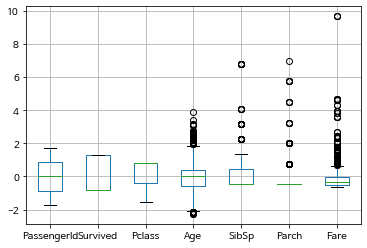

In [3]:
titan_num = titan.select_dtypes(exclude='object')
titan_num_std = scale(titan_num)
titan_num_std = pd.DataFrame(titan_num_std, columns=titan_num.columns)
titan_num_std.boxplot()
titan_char = titan.select_dtypes(include='object')

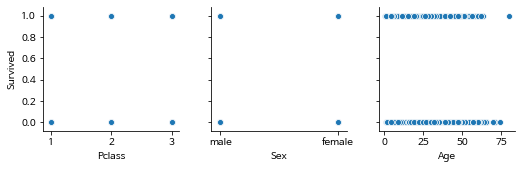

In [47]:
sns.pairplot(titan, y_vars=['Survived'], x_vars=["Pclass",'Sex','Age'])

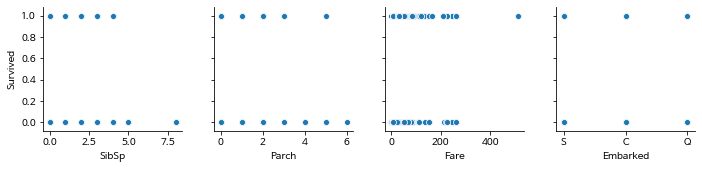

In [48]:
sns.pairplot(titan, y_vars=['Survived'], x_vars=['SibSp','Parch','Fare','Embarked'])

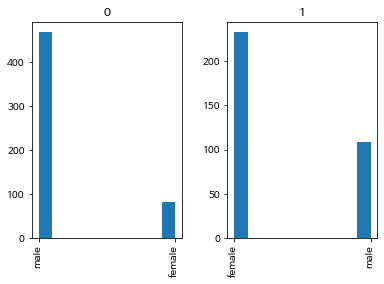

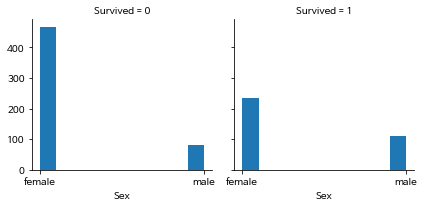

In [49]:
titan.hist(column="Sex", by="Survived")
grid = sns.FacetGrid(titan, col="Survived")
grid.map(plt.hist, "Sex")

In [53]:
titan_count = titan["Survived"].value_counts()
titan_count

0    549
1    342
Name: Survived, dtype: int64

In [59]:
group = titan.groupby(['Survived','Sex'],as_index=False).size()
group

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
dtype: int64

In [58]:
print(549/891 * 100)

61.61616161616161


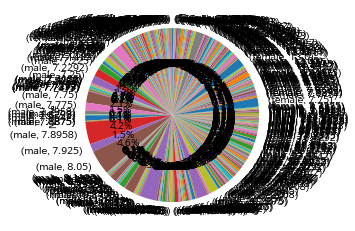

In [62]:
df_count = titan.groupby(['Sex', 'Fare']).size()
df_count.plot.pie(y="OXY", autopct="%.1f%%")

In [66]:
def divide_age(age):
    if age<10 : 
        result = "영유아"
    elif age >= 10 and age<20 : 
        result = "10대"
    elif age>=20 and age<30:
        result = "20대"
    elif age>=30 and age<40:
        result = "30대"
    elif age>=40 and age<50:
        result = "40대"
    elif age>=50 and age<60:
        result = "50대"
    elif age>=60 and age<70:
        result = "60대"
    elif age>=70 and age<80:
        result = "70대"
    elif age>=80:
        result = "80대"
    return result

In [68]:
# new = pd.DataFrame({"PassengerId":titan['PassengerId']
#                     ,"Survived":titan['Survived'],
#                     "Pclass":titan['Pclass'],
#                    "Name":titan['Name']
#                    "Sex":titan['Sex'],
#                    "Age":divide_age(titan['Age'])})
print(type(titan['Age']))

<class 'pandas.core.series.Series'>


In [12]:
# titan.loc[titan['Age'] < 38, 'Age'] = 72
print(type(titan['Age']))

<class 'pandas.core.series.Series'>


In [13]:
titan.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age             object
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object